In [48]:
#This is an minimal example for the calculation of an optimal control input 
#to a coupled network of FitzHugh-Nagumo oscillators. In this example the control 
#task is to switch between predefined bistable states. For more precise documentationa 
#and for altering parameters please use the jupyter notebook file example.ibynb!

#The calculation of this example might take a few minutes.

#!/usr/bin/env python
# coding: utf-8

import sys
import os
absFilePath = os.path.abspath('example_state_switching.py')
fileDir = os.path.dirname(absFilePath)
parentDir = os.path.dirname(fileDir)

import functions as functions
from FRoptimize import FR_algorithm

import numpy as np
import pickle
import matplotlib.pyplot as plt
from pylab import figure, cm

goal='switch'
bifurcation='low'
switchfromto='lowtohigh' 
noise_strength= 0.0 
realizations=1
noise=0
parameters = functions.set_parameters(goal,bifurcation,parentDir) 

#Set dimensions
T= 400 #simulation and control time 
dt=0.1 #time stepsize
tsteps=int(T/dt) #number of timesteps
d=2 #dimension of each FitzHugh-Nagumo node

#set parameters of the cost functional
I_p_in= 0.0005
I_p=np.zeros((tsteps,parameters['N']))
I_p[int(tsteps-25/dt):]=I_p_in*np.ones((int(25/dt),parameters['N']))
I_e= 0.1#1.0 
I_s= 0.0


#choose initial condition for control
control=-np.ones((tsteps,parameters['N']))*0.002
control=control.reshape(tsteps*parameters['N'])

node_ic,target_output=functions.read_node_inis_from_file(bifurcation,switchfromto,fileDir,tsteps,d,dt,parameters)

#make dictionary with all parameters
args = {
    'tsteps':tsteps,
    'dt':dt,
    'd':d,
    'I_p':I_p,
    'I_e':I_e,
    'I_s':I_s,
    'target_output':target_output,
    'node_ic':node_ic,
    'realizations':realizations,
    'noise':noise
    }
args.update(parameters)

In [22]:
parameters['mu']

0.378

In [31]:
parameters['mu'] = 1.5
args.update(parameters)

In [32]:
ic_high = functions.set_random_initial_conds_for_nodes(bifurcation,noise_strength,tsteps,d,dt,parameters,realizations,noise)

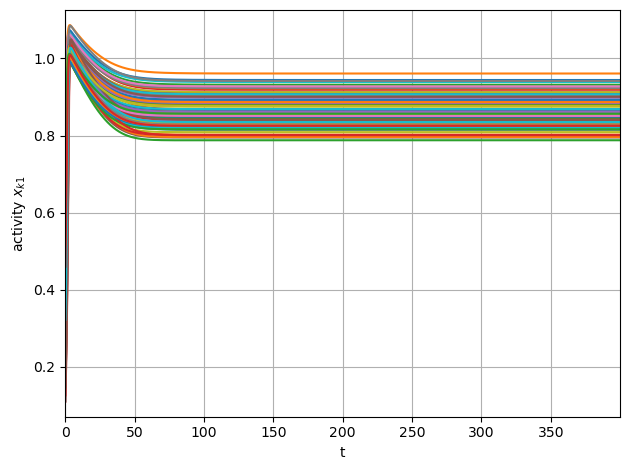

In [20]:
state_high=functions.plot_runge_kutta(functions.ODE_FHN_network,nocontrol, **args)
create_plot(state_high[:,0,:],'activity $x_{k1}$')
plt.show()

In [35]:
args['node_ic'] = state_high[3000,:,:]

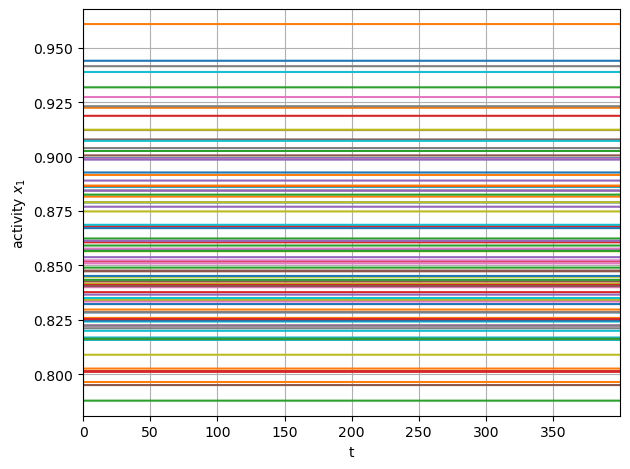

In [46]:
#state_high2=functions.plot_runge_kutta(functions.ODE_FHN_network,nocontrol, **args)
create_plot(state_high2[:,0,:],'activity $x_{1}$')
plt.show()

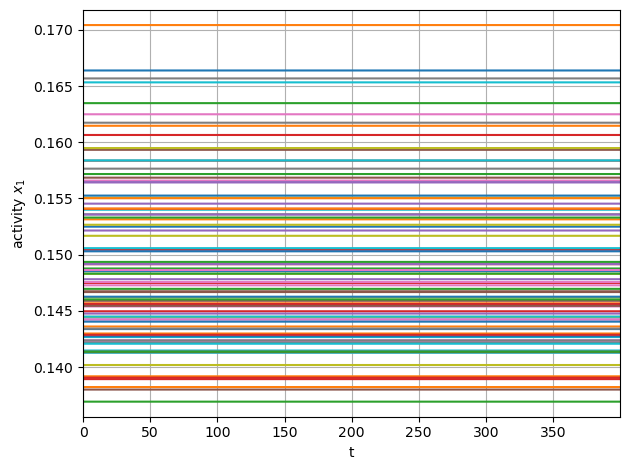

In [47]:
#ic_low = functions.set_random_initial_conds_for_nodes(bifurcation,noise_strength,tsteps,d,dt,parameters,realizations,noise)
#state_low=functions.plot_runge_kutta(functions.ODE_FHN_network,nocontrol, **args)
create_plot(state_low[:,0,:],'activity $x_{1}$')
plt.show()

In [9]:
#In this case we want to find an optimal control that induces a switching 
#from an initial low state to a high target state. The uncontrolled state and 
#the target state are plotted:

def create_plot(data,ylabel):
    fs=10 #fontsize
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

    # set min and max for scope of y-axis
    minn=np.min(data)
    maxx=np.max(data)
    add=(maxx-minn)/25

    im1=ax.plot(np.arange(0,int(T),dt),data)
    ax.set_xlabel('t',size=fs)
    ax.set_ylabel(ylabel,size=fs)
    ax.set_ylim(minn-add,maxx+add)
    #ax.set_title(title,size=fs, pad=20)
    ax.tick_params(labelsize=fs)
    ax.grid(True)
    ax.margins(0) # remove default margins (matplotlib verision 2+)

    return fig.tight_layout()


In [43]:
#In this case we want to find an optimal control that induces a switching 
#from an initial low state to a high target state. The uncontrolled state and 
#the target state are plotted:

def create_plot(data,ylabel):
    fig, ax = plt.subplots(nrows=1, ncols=1)

    # set min and max for scope of y-axis
    minn=np.min(data)
    maxx=np.max(data)
    add=(maxx-minn)/25

    im1=ax.plot(np.arange(0,int(T),dt),data)
    ax.set_xlabel('t')
    ax.set_ylabel(ylabel)
    ax.set_ylim(minn-add,maxx+add)
    #ax.set_title(title,size=fs, pad=20)
    ax.tick_params()
    ax.grid(True)
    ax.margins(0) # remove default margins (matplotlib verision 2+)

    return fig.tight_layout()


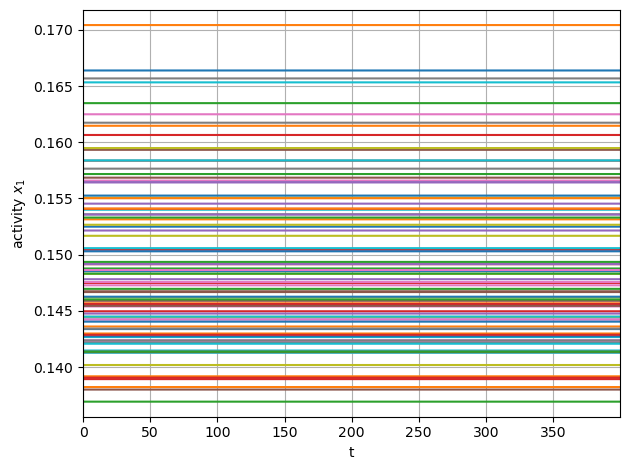

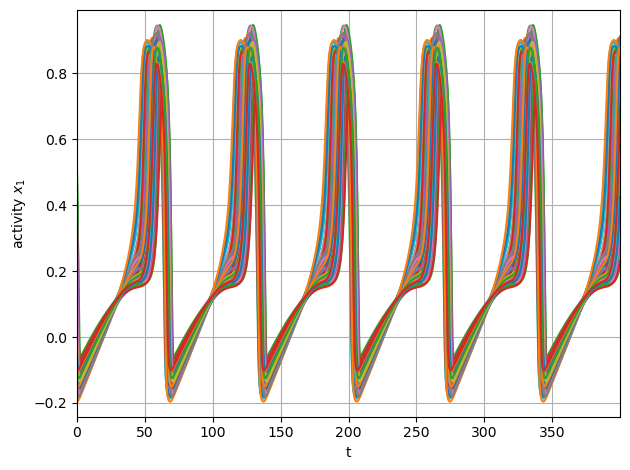

In [49]:
#calculate the uncontrolled state
#nocontrol=np.zeros((tsteps,parameters['N']))
#state_uncontrolled=functions.plot_runge_kutta(functions.ODE_FHN_network,nocontrol, **args)

create_plot(state_uncontrolled[:,0,:],'activity $x_{1}$')
plt.show()
create_plot(target_output,'activity $x_{1}$')
plt.show()

In [ ]:
#In this case we want to find an optimal control that induces a switching 
#from an initial low state to a high target state. The uncontrolled state and 
#the target state are plotted:

def create_plot(data,ylabel):
    fig, ax = plt.subplots(nrows=1, ncols=1)

    # set min and max for scope of y-axis
    minn=np.min(data)
    maxx=np.max(data)
    add=(maxx-minn)/25

    im1=ax.plot(np.arange(0,int(T),dt),data)
    ax.set_xlabel('t')
    ax.set_ylabel(ylabel)
    ax.set_ylim(minn-add,maxx+add)
    #ax.set_title(title,size=fs, pad=20)
    ax.tick_params()
    ax.grid(True)
    ax.margins(0) # remove default margins (matplotlib verision 2+)

    return fig.tight_layout()


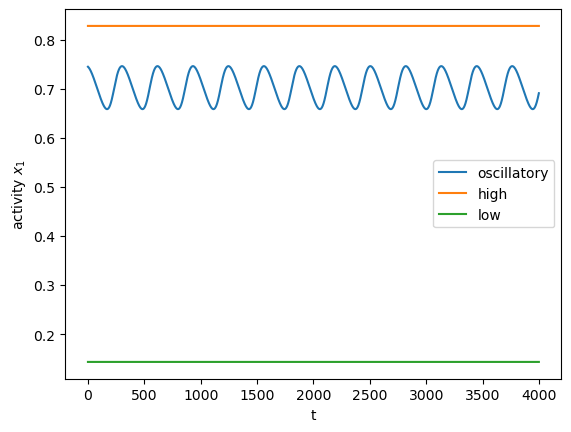

In [45]:
plt.plot(target_output[:,0],label='oscillatory')
plt.plot(state_high2[:,0,0],label='high')
plt.plot(state_low[:,0,0],label='low')
plt.ylabel('activity $x_{1}$')
plt.xlabel('t')
plt.legend()
plt.show()

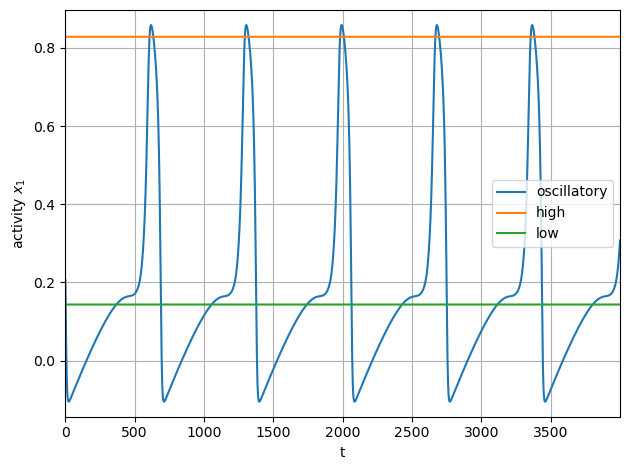

In [50]:
def create_plot(data_list, labels, ylabel):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    
    T = len(data_list[0])
    dt = 1  # assuming a constant time step of 1, adjust if needed

    # set min and max for scope of y-axis
    all_data = np.concatenate(data_list)
    minn = np.min(all_data)
    maxx = np.max(all_data)
    add = (maxx - minn) / 25

    for data, label in zip(data_list, labels):
        ax.plot(np.arange(0, int(T), dt), data, label=label)

    ax.set_xlabel('t')
    ax.set_ylabel(ylabel)
    ax.set_ylim(minn - add, maxx + add)
    ax.tick_params()
    ax.grid(True)
    ax.margins(0)  # remove default margins (matplotlib version 2+)
    ax.legend()

    fig.tight_layout()
    plt.show()


create_plot([target_output[:, 0], state_high2[:, 0, 0], state_low[:, 0, 0]],
            ['oscillatory', 'high', 'low'], 
            'activity $x_{1}$')


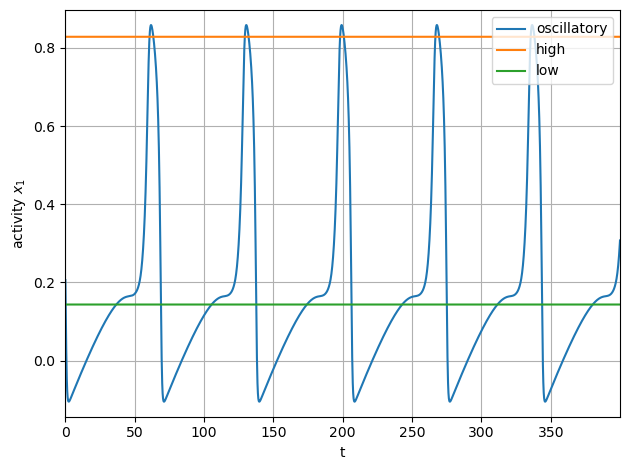

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def create_plot(data_list, labels, ylabel, T, dt):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    
    # Generate x-axis values based on T and dt
    x_values = np.arange(0, T, dt)
    
    # set min and max for scope of y-axis
    all_data = np.concatenate(data_list)
    minn = np.min(all_data)
    maxx = np.max(all_data)
    add = (maxx - minn) / 25

    for data, label in zip(data_list, labels):
        ax.plot(x_values, data, label=label)

    ax.set_xlabel('t')
    ax.set_ylabel(ylabel)
    ax.set_ylim(minn - add, maxx + add)
    ax.tick_params()
    ax.grid(True)
    ax.margins(0)  # remove default margins (matplotlib version 2+)
    ax.legend(loc='upper right')

    fig.tight_layout()
    plt.show()


create_plot([target_output[:, 0], state_high2[:, 0, 0], state_low[:, 0, 0]],
            ['oscillatory', 'high', 'low'], 
            'activity $x_{1}$',
            T, dt)


In [3]:
target_output.shape

(8000, 94)

In [ ]:
import pykoopman as pk
regr = pk.regression.EDMD()
obsv = pk.observables.Polynomial(degree=3)
model_edmd = pk.Koopman(observables=obsv, regressor=regr)
model_edmd.fit(target_output, dt=dt)

/Users/shi/anaconda3/envs/m5r/lib/python3.11/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)
/Users/shi/anaconda3/envs/m5r/lib/python3.11/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


In [25]:
#To find the optimal control we define the cost functional and its gradient and start the optimization loop.

#define the functional and its gradient
functional=functions.f_switch
gradient=functions.fprime_switch

#initialize the control loop
iteration=0 
#warnflag=1-> running, warnflag=0->finished, warnflag=3->error
warnflag=1
#start the optmization
result = FR_algorithm(functional, control, max_k=1000, gradient,**args)
control=result[0]
warnflag=result[2]
iteration+=result[4]
print('Code finished after ',iteration,' iterations with warnflag',result[2])

SyntaxError: positional argument follows keyword argument (1719711491.py, line 12)

In [29]:
#To find the optimal control we define the cost functional and its gradient and start the optimization loop.

#define the functional and its gradient
functional=functions.f_switch
gradient=functions.fprime_switch

#initialize the control loop
iteration=0 
#warnflag=1-> running, warnflag=0->finished, warnflag=3->error
warnflag=1
#start the optmization
result = FR_algorithm(functional, control, gradient, max_k=1000, **args)
control=result[0]
warnflag=result[2]
iteration+=result[4]
print('Code finished after ',iteration,' iterations with warnflag',result[2])

Maximal iteration of FR algorithm reached.
Code finished after  1000  iterations with warnflag 1


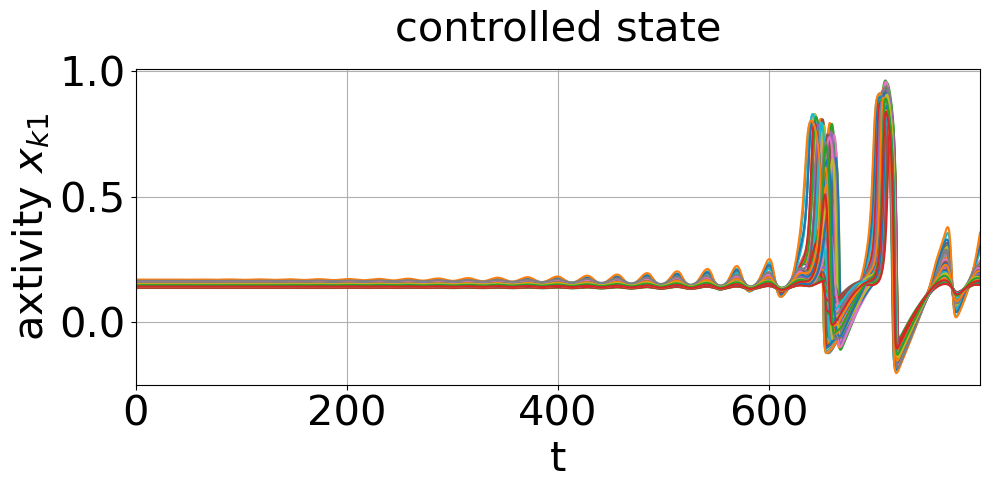

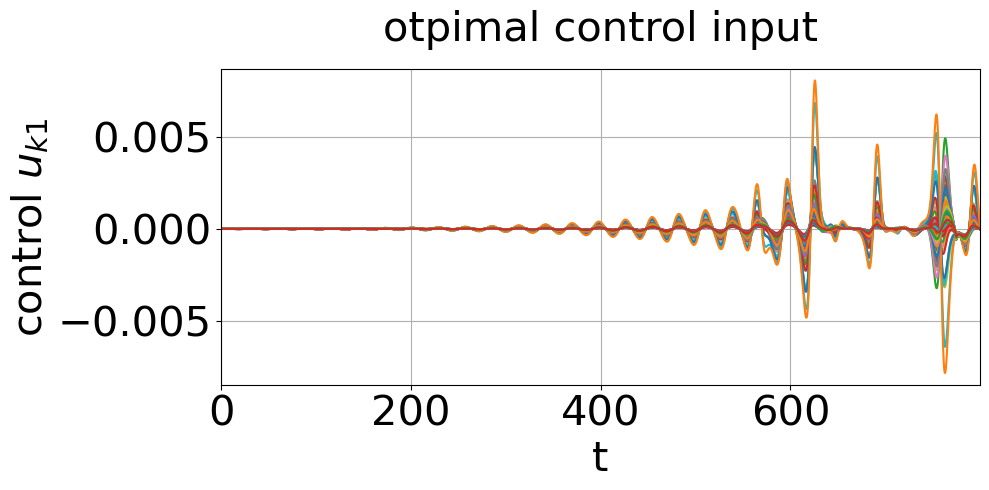

In [30]:
#The results can now be plottet:

#calculate the controlled state
control=control.reshape(tsteps,parameters['N'])
state_controlled=functions.plot_runge_kutta(functions.ODE_FHN_network,control, **args)

create_plot(state_controlled[:,0,:],'axtivity $x_{k1}$','controlled state')
plt.show()
create_plot(control,'control $u_{k1}$','otpimal control input')
plt.show()


In [22]:
#The results can now be plottet:

#calculate the controlled state
control=control.reshape(tsteps,parameters['N'])
state_controlled=functions.plot_runge_kutta(functions.ODE_FHN_network,control, **args)

create_plot(state_controlled[:,0,:],'axtivity $x_{k1}$','controlled state')
plt.show()
create_plot(control,'control $u_{k1}$','otpimal control input')
plt.show()


ValueError: cannot reshape array of size 376000 into shape (40000,94)

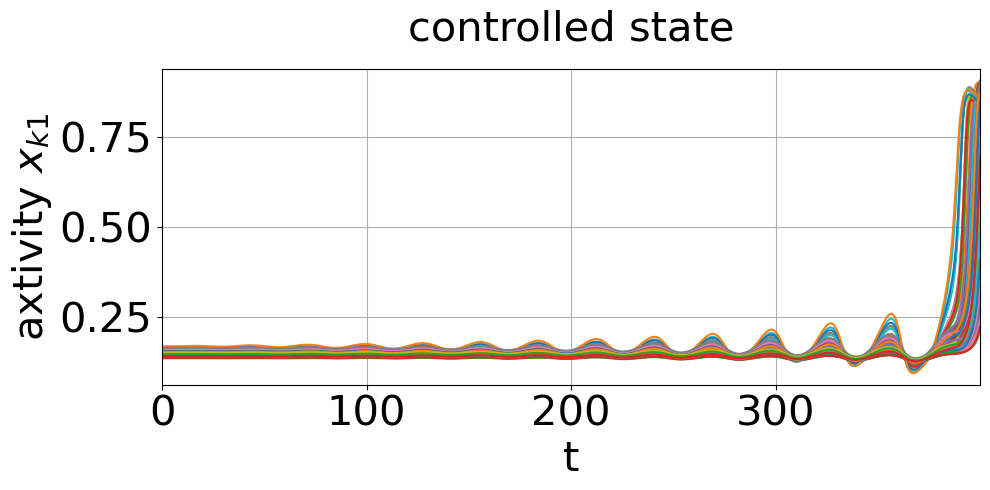

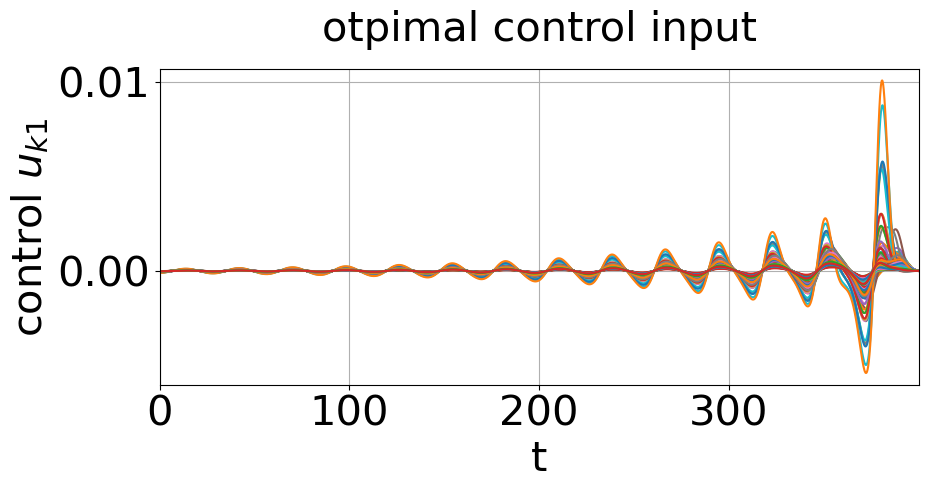

In [6]:
#The results can now be plottet:

#calculate the controlled state
control=control.reshape(tsteps,parameters['N'])
state_controlled=functions.plot_runge_kutta(functions.ODE_FHN_network,control, **args)

create_plot(state_controlled[:,0,:],'axtivity $x_{k1}$','controlled state')
plt.show()
create_plot(control,'control $u_{k1}$','otpimal control input')
plt.show()


### koopman

In [85]:
from pydmd import DMD
import pykoopman as pk

dmd = DMD(svd_rank=10)
model_dmd = pk.Koopman(regressor=dmd)

AttributeError: 'DMD' object has no attribute 'tlsq_rank'

In [6]:
model_dmd.fit(target_output.T)

Phi = model_dmd.regressor.regressor.modes

/Users/shi/anaconda3/envs/M4R/lib/python3.9/site-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 3177662803.6223464. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


/Users/shi/anaconda3/envs/M4R/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/shi/anaconda3/envs/M4R/lib/python3.9/site-packages/matplotlib/transforms.py:2877: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


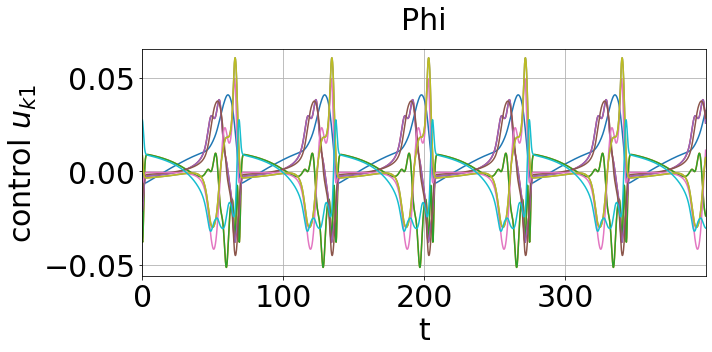

In [7]:
create_plot(Phi,'control $u_{k1}$','Phi')
plt.show()

/Users/shi/anaconda3/envs/M4R/lib/python3.9/site-packages/pydmd/snapshots.py:72: UserWarning: Input data condition number 649150645574.4677. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
/Users/shi/anaconda3/envs/M4R/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/shi/anaconda3/envs/M4R/lib/python3.9/site-packages/matplotlib/transforms.py:2877: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


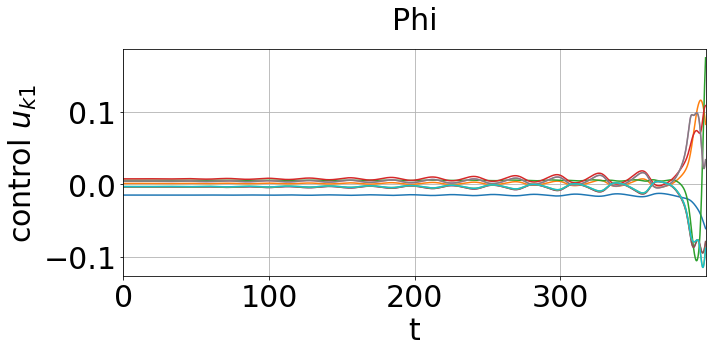

In [8]:
model_dmd.fit(state_controlled[:,0,:].T)

Phi = model_dmd.regressor.regressor.modes
create_plot(Phi,'control $u_{k1}$','Phi')
plt.show()

In [14]:
import pykoopman as pk

In [15]:
EDMDc = pk.regression.EDMDc()
RBF = pk.observables.RadialBasisFunction(rbf_type='thinplate', n_centers=10, centers=None, kernel_width=1.0, polyharmonic_coeff=1.0, include_state=True)

model = pk.Koopman(observables=RBF, regressor=EDMDc)
model.fit(state_controlled[:,0,:], u=control)

/Users/shi/anaconda3/envs/m5r/lib/python3.11/site-packages/pykoopman/observables/_radial_basis_functions.py:180: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.measurement_matrix_ = np.linalg.lstsq(xlift, x)[0].T


Koopman(observables=RadialBasisFunction(centers=array([[0.14726831, 0.27631196, 0.23227352, 0.21545017, 0.24574674,
        0.17316811, 0.13119916, 0.14861326, 0.30756337, 0.21379446],
       [0.13509722, 0.25151072, 0.26136539, 0.28513372, 0.24319457,
        0.24226907, 0.26051114, 0.1666973 , 0.12996975, 0.24920459],
       [0.58290968, 0.43533638, 0.1268041 , 0.14262216, 0.68923689,
        0.9009282 , 0.61199...
       [0.30625342, 0.34990513, 0.33820189, 0.66615948, 0.62308223,
        0.16266996, 0.53887297, 0.25131833, 0.70842014, 0.12592546],
       [0.18461023, 0.27793909, 0.1290706 , 0.39689531, 0.45477544,
        0.52447273, 0.61459878, 0.71181662, 0.42179456, 0.4614721 ],
       [0.17325834, 0.27713994, 0.37592124, 0.41626403, 0.12727243,
        0.52693435, 0.20552289, 0.49025355, 0.69333898, 0.25210199]]),
                                        rbf_type='thinplate'),
        regressor=EDMDc())

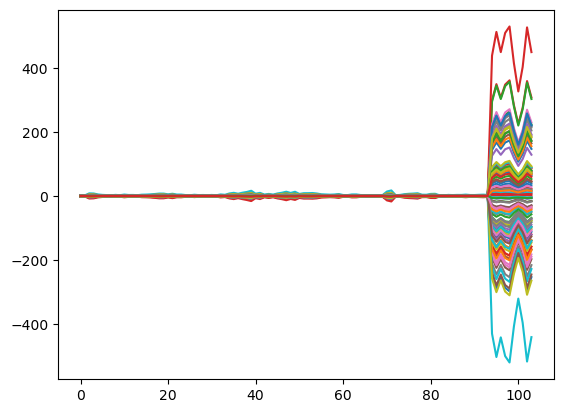

In [18]:
plt.plot(model.A)
plt.show()

koopman eigenvalues = [  2.35154092+0.39714861j   2.35154092-0.39714861j
   1.47717782+0.j           0.98493987+0.j
   0.57273961+0.j           2.3382839 +0.3106135j
   2.3382839 -0.3106135j    2.36646529+0.2749385j
   2.36646529-0.2749385j    2.06186217+0.25818458j
   2.06186217-0.25818458j   1.84185219+0.j
   2.35495787+0.21998205j   2.35495787-0.21998205j
   2.03626193+0.j           1.98861935+0.j
   2.37015164+0.17433742j   2.37015164-0.17433742j
   2.36644858+0.14275883j   2.36644858-0.14275883j
   2.35532835+0.10848728j   2.35532835-0.10848728j
   2.18953071+0.j           2.34287073+0.06487116j
   2.34287073-0.06487116j   2.30744327+0.07605039j
   2.30744327-0.07605039j   2.30999827+0.05757624j
   2.30999827-0.05757624j   2.33271228+0.01852812j
   2.33271228-0.01852812j   2.26428081+0.j
   2.30454451+0.04051325j   2.30454451-0.04051325j
   2.2733542 +0.j          -0.55904832+0.j
   2.31095619+0.j           2.30098042+0.j
   2.30188039+0.j          -1.06790015+0.j
  -1.66023955+0.

/Users/shi/anaconda3/envs/m5r/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


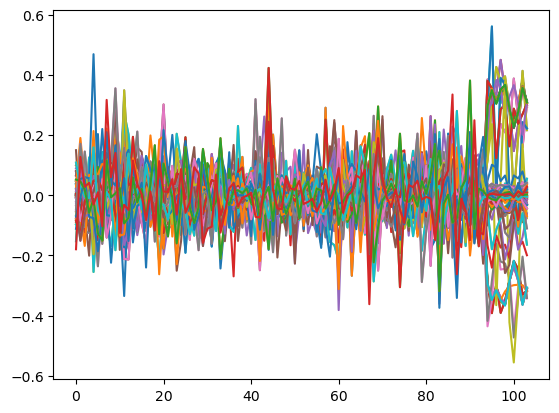

In [21]:
evals, evecs = np.linalg.eig(model.A)
koop_eigenvals = np.log(evals/dt)

print(f"koopman eigenvalues = {koop_eigenvals}")
plt.plot(evecs)
plt.show()

In [47]:
Xkoop = model.simulate(state_controlled[np.newaxis,0,0,:], u=control, n_steps=30)

In [76]:
Xkoop_2 = model.simulate(state_controlled[np.newaxis,0,0,:], u=control, n_steps=46)

/Users/shi/anaconda3/envs/m5r/lib/python3.11/site-packages/pykoopman/observables/_radial_basis_functions.py:259: RuntimeWarning: overflow encountered in square
  r_squared = np.sum((x - C[np.newaxis, :]) ** 2, axis=1)
/Users/shi/anaconda3/envs/m5r/lib/python3.11/site-packages/pykoopman/regression/_edmdc.py:154: RuntimeWarning: invalid value encountered in matmul
  y = x @ self.state_matrix_.T + u @ self.control_matrix_.T


In [82]:
model.A

array([[ 1.81422322e-01, -2.72782491e-01, -3.73149552e-01, ...,
         7.58015097e-02,  3.28364306e-01,  1.87451677e-01],
       [ 1.36497142e-01, -1.75476180e-01, -2.77815292e-01, ...,
         5.16945288e-02,  2.46739986e-01,  1.39720682e-01],
       [ 4.04566797e-01, -9.58540092e-01, -5.80206332e-01, ...,
         1.67787320e-01,  1.09813640e+00,  6.09276683e-01],
       ...,
       [-2.05147210e+01,  4.20042483e+01,  5.29865503e+01, ...,
        -1.15721574e+01, -4.70636644e+01, -2.61937567e+01],
       [-2.28283613e+01,  4.71160775e+01,  5.88765743e+01, ...,
        -1.36815399e+01, -5.21136064e+01, -2.94536126e+01],
       [-2.07190125e+01,  4.23939791e+01,  5.32726850e+01, ...,
        -1.12182764e+01, -4.73058897e+01, -2.58823828e+01]])

In [83]:
model.B

array([[-2.46026993e-01, -2.24884635e-02, -7.45284645e-01, ...,
         3.65007331e-01,  3.27544129e-01,  2.78551276e-01],
       [-1.80251252e-01, -1.00022094e-02, -5.59345871e-01, ...,
         2.74725144e-01,  2.42457143e-01,  2.11795191e-01],
       [-7.77970306e-01, -7.49428788e-02, -2.32077434e+00, ...,
         1.15845634e+00,  9.98920958e-01,  8.82939708e-01],
       ...,
       [ 3.56881846e+01,  3.62804585e+00,  1.05005192e+02, ...,
        -5.20691851e+01, -4.61485609e+01, -3.95067292e+01],
       [ 4.00231820e+01,  4.03038103e+00,  1.17500175e+02, ...,
        -5.83069946e+01, -5.15045154e+01, -4.42410285e+01],
       [ 3.56176117e+01,  3.42307924e+00,  1.05602948e+02, ...,
        -5.21551352e+01, -4.63551388e+01, -3.97436278e+01]])

In [81]:
Xkoop_2

array([[1.43340916e-001, 1.39219022e-001, 1.63207682e-001, ...,
        1.42911976e-001, 1.48241195e-001, 1.42854542e-001],
       [1.43805734e-001, 1.39575879e-001, 1.64395980e-001, ...,
        1.43569956e-001, 1.48915581e-001, 1.43434242e-001],
       [1.44456532e-001, 1.40073113e-001, 1.66131148e-001, ...,
        1.44475115e-001, 1.49884611e-001, 1.44243328e-001],
       ...,
       [3.78328434e+084, 2.39270528e+084, 1.03784021e+085, ...,
        5.30527601e+084, 6.65974653e+084, 5.31664522e+084],
       [5.62317818e+171, 3.55633013e+171, 1.54256457e+172, ...,
        7.88534765e+171, 9.89852678e+171, 7.90224596e+171],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])

Text(0.5, 1.0, 'L2 norm error = 1.3884806737192457')

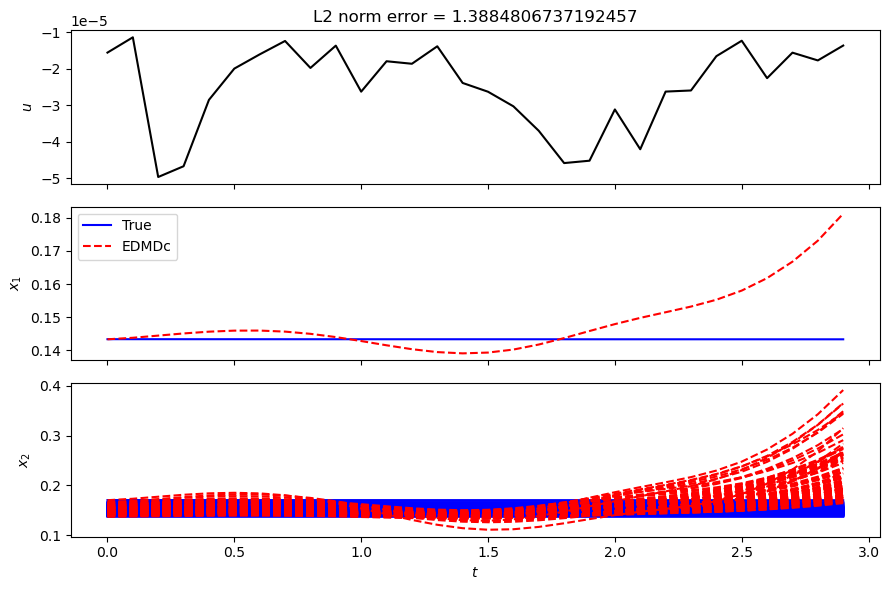

In [67]:
Xtrue = state_controlled[1:31,0,:]
t = np.arange(0, Xkoop.shape[0]*dt, dt)
u = control[0,:30]
fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True, figsize=(9, 6))
axs[0].plot(t, u, '-k')
axs[0].set(ylabel=r'$u$')
axs[1].plot(t, Xtrue[:, 0], '-', color='b', label='True')
axs[1].plot(t, Xkoop[:, 0], '--r', label='EDMDc')
axs[1].set(ylabel=r'$x_1$')
axs[2].plot(t, Xtrue, '-', color='b', label='True')
axs[2].plot(t, Xkoop, '--r', label='EDMDc')
axs[2].set(
        ylabel=r'$x_2$',
        xlabel=r'$t$')

axs[1].legend()

err = np.linalg.norm(Xtrue - Xkoop)
axs[0].set_title(f"L2 norm error = {err}")

Text(0.5, 1.0, 'L2 norm error = nan')

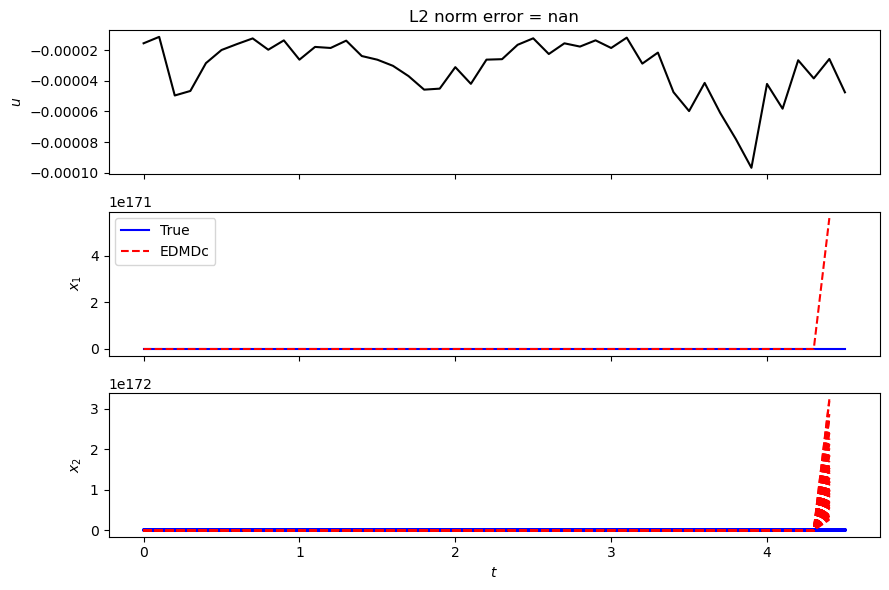

In [80]:
Xtrue = state_controlled[1:47,0,:]
t = np.arange(0, Xkoop_2.shape[0]*dt, dt)
u = control[0,:46]
fig, axs = plt.subplots(3, 1, sharex=True, tight_layout=True, figsize=(9, 6))
axs[0].plot(t, u, '-k')
axs[0].set(ylabel=r'$u$')
axs[1].plot(t, Xtrue[:, 0], '-', color='b', label='True')
axs[1].plot(t, Xkoop_2[:, 0], '--r', label='EDMDc')
axs[1].set(ylabel=r'$x_1$')
axs[2].plot(t, Xtrue, '-', color='b', label='True')
axs[2].plot(t, Xkoop_2, '--r', label='EDMDc')
axs[2].set(
        ylabel=r'$x_2$',
        xlabel=r'$t$')

axs[1].legend()

err = np.linalg.norm(Xtrue - Xkoop_2)
axs[0].set_title(f"L2 norm error = {err}")

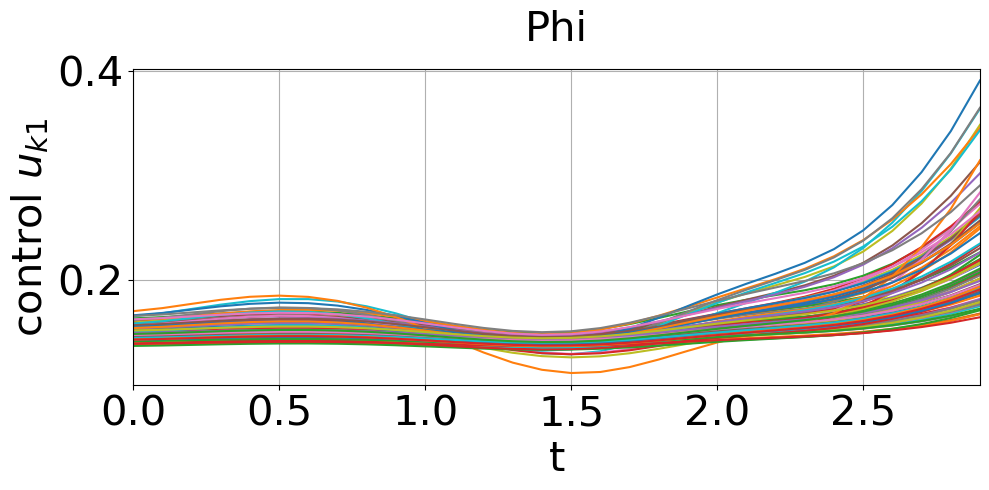

In [53]:
def create_plot(data,ylabel,title):
    fs=30 #fontsize
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

    # set min and max for scope of y-axis
    minn=np.min(data)
    maxx=np.max(data)
    add=(maxx-minn)/25
    
    im1=ax.plot(np.arange(0,data.shape[0]*dt,dt),data)
    ax.set_xlabel('t',size=fs)
    ax.set_ylabel(ylabel,size=fs)
    ax.set_ylim(minn-add,maxx+add)
    ax.set_title(title,size=fs, pad=20)
    ax.tick_params(labelsize=fs)
    ax.grid(True)
    ax.margins(0) # remove default margins (matplotlib verision 2+)

    return fig.tight_layout()

create_plot(Xkoop,'control $u_{k1}$','Phi')
plt.show()

### classical forced FHN

In [50]:
control.shape

(4000, 94)

In [9]:
DMDc = pk.regression.DMDc(svd_rank=11, svd_output_rank=10)

model = pk.Koopman(regressor=DMDc)

In [7]:
print(state_controlled[:,0,:].shape,control.shape)

(4000, 94) (4000, 94)


In [10]:
model.fit(state_controlled[:,0,:].T,control[:,np.newaxis],dt)
Aest = model.state_transition_matrix
Best = model.control_matrix

UnboundLocalError: local variable 'C' referenced before assignment

In [45]:
Phic = model.modes

In [46]:
Phic.shape

(94, 10)

ValueError: x and y must have same first dimension, but have shapes (4000,) and (94, 5)

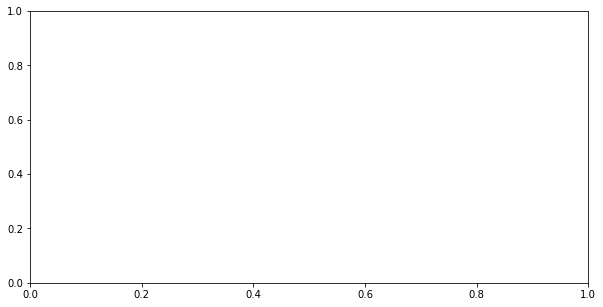

In [41]:
create_plot(Phic,'axtivity $x_{k1}$','controlled state')
plt.show()